<a href="https://colab.research.google.com/github/Rachita-G/Python_Practice/blob/main/Models/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA - PRINCIPLE COMPONENT ANALYSIS

Principal Component Analysis or PCA is a widely used technique for dimensionality reduction of the large data set. Reducing the number of components or features costs some accuracy and on the other hand, it makes the large data set simpler, easy to explore and visualize. Also, it reduces the computational complexity of the model which makes machine learning algorithms run faster. It is always a question and debatable how much accuracy it is sacrificing to get less complex and reduced dimensions data set.

Remember that PCA is just a transformation of your data and attempts to find out what features explain the most variance in your data. 

Look at: https://setosa.io/ev/principal-component-analysis/

## ABOUT PCA
* PCA is a dimensionality reduction technique that transforms a number of possibly correlated variables into a smaller number of uncorrelated variables; called principal components
* The goal of PCA is to extract the most important information from the data table by compressing the size of the data set and keeping only the important information; then PCA computes new variables called principal components.
* The first principal component is required to have the largest possible variance (inertia) and therefore this component will explain the largest part of the inertia / variance of the data table; hence the less principal components you have the lower the inertia will be after PCA.
* For every new component you add, the inertia will increase since the rotations are always performed in a subspace and the new axes will always explain less inertia than the original components; which are computed to be optimal
* Therefore, inertia should not be the criterium to choose the optimal number of principal component since the lower the components are the lower the inertia will be.
* 95% explained variance should be the criterium when choosing the number of principal components

## Note:
- Drawback: it deesnot work well in case of outliers present in the data.

- Applications: Stock market prediction, noise filtering, feature extraction.

- Goals: detect the correlation between the variables, identify the patterns in the data, reduce d dimesnional dataset by projecting it onto a k dimensional subspace for k<=d.

- Remember that: just like regression analysis, the method fits the best line of fit, but rather than prediciting the values, PCA tries to learn the relationship between the variables in the model qauntified by listing a set of principle axis.

In [ ]:
import os
os.getcwd()

'C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Codes'

In [ ]:
os.chdir('C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Notes')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 

In [ ]:
import os
os.getcwd()

'C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Codes'

In [ ]:
iris=pd.read_csv('C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Data\\iris_with_answers.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.isna().sum().sum()

0

In [ ]:
X=iris.iloc[:,:-1].values
y=iris.iloc[:,-1].values

# Steps Involved in PCA
* Standardize the data. (with mean =0 and variance = 1)
* Compute the Covariance matrix of dimensions. 
* Obtain the Eigenvectors and Eigenvalues from the covariance matrix (we can also use correlation matrix or even Single vector decomposition, however in this post will focus on covariance matrix).
* Sort eigenvalues in descending order and choose the top k Eigenvectors that correspond to the k largest eigenvalues (k will become the number of dimensions of the new feature subspace k≤d, d is the number of original dimensions).
* Construct the projection matrix W from the selected k Eigenvectors.
* Transform the original data set X via W to obtain the new k-dimensional feature subspace Y.

# 1. Standardization
When there are different scales used for the measurement of the values of the features, then it is advisable to do the standardization to bring all the feature spaces with mean = 0 and variance = 1.
The reason why standardization is very much needed before performing PCA is that PCA is very sensitive to variances. Meaning, if there are large differences between the scales (ranges) of the features, then those with larger scales will dominate over those with the small scales.

In [ ]:
ss=StandardScaler()
X_std=ss.fit_transform(X)
X_std

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# 2. Eigen decomposition — Computing Eigenvectors and Eigenvalues
The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA:
The Eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude.
In other words, the eigenvalues explain the variance of the data along the new feature axes. It means the corresponding eigenvalue tells us that how much variance is included in that new transformed feature.
To get eigenvalues and Eigenvectors we need to compute the covariance matrix. So in the next step let’s compute it.

**Covariance Matrix**
The classic approach to PCA is to perform the Eigen decomposition on the covariance matrix Σ, which is a d×d matrix where each element represents the covariance between two features. Note, d is the number of original dimensions of the data set.

In [ ]:
np.cov(X_std,rowvar=False)

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [ ]:
# or
cov_mat=np.cov(X_std.T)
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

**Linear Algebra** we take a matrix A and calulate [A-lambda I].v==0
here, v is eigen vector and lambda is eigenvalue and A is covariance matrix

In [ ]:
evalue,evector=np.linalg.eig(cov_mat)
print('eigenvalue','\n\n',evalue,'\n\n')
print('eigenvector','\n\n',evector)

eigenvalue 

 [2.93035378 0.92740362 0.14834223 0.02074601] 


eigenvector 

 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [ ]:
eig=[]
for i in evector:
    eig.append(i**2)
    print(eig)
sum(eig)

[array([0.27287211, 0.13862096, 0.51986524, 0.06864169])]
[array([0.27287211, 0.13862096, 0.51986524, 0.06864169]), array([0.06935581, 0.85665482, 0.05857991, 0.01540945])]
[array([0.27287211, 0.13862096, 0.51986524, 0.06864169]), array([0.06935581, 0.85665482, 0.05857991, 0.01540945]), array([3.37856219e-01, 4.44989610e-04, 1.98506285e-02, 6.41848163e-01])]
[array([0.27287211, 0.13862096, 0.51986524, 0.06864169]), array([0.06935581, 0.85665482, 0.05857991, 0.01540945]), array([3.37856219e-01, 4.44989610e-04, 1.98506285e-02, 6.41848163e-01]), array([0.31991586, 0.00427922, 0.40170422, 0.2741007 ])]


array([1., 1., 1., 1.])

In [ ]:
print("sum of squares of each values in an eigen vector is \n", 0.27287211+ 0.13862096+0.51986524+ 0.06864169)

sum of squares of each values in an eigen vector is 
 1.0


# 3. Selecting The Principal Components
The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes.
However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1.

So now the question comes that how to select the new set of Principal components. The rule behind is that we sort the Eigenvalues in descending order and then choose the top k features concerning top k Eigenvalues.

The idea here is that by choosing top k we have decided that the variance which corresponds to those k feature space is enough to describe the data set. And by losing the remaining variance of those not selected features, won’t cost the accuracy much or we are OK to loose that much accuracy that costs because of neglected variance.
So this is the decision which we have to make based on the problem set given and also based on the business case. There is no perfect rule to decide it.

**Sorting eigenvalues**

To decide which Eigenvector(s) can be dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues:
The Eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
To do so, the common approach is to rank the eigenvalues from highest to lowest to choose the top k Eigenvectors.

In [ ]:
eig_pairs=[(np.abs(evalue[i]), evector[:,i]) for i in range(len(evalue))] 
eig_pairs

[(2.930353775589315,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.9274036215173407,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.1483422264816398,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.02074601399559622,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

In [ ]:
print(type(eig_pairs)) 

<class 'list'>


In [ ]:
#Visually confirm that the list is correctly sorted by decreasing eigenvalues 
print('Eigenvalues in descending order:') 
for i in eig_pairs: 
    print(i[0])

Eigenvalues in descending order:
2.930353775589315
0.9274036215173407
0.1483422264816398
0.02074601399559622


**Explained Variance**

After sorting the eigenpairs, the next question is “how many principal components are we going to choose for our new feature subspace?”
A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues.
The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [ ]:
total_evalues=sum(evalue)
total_evalues

4.026845637583892

In [ ]:
var_exp = [(i / total_evalues)*100 for i in sorted(evalue, reverse=True)]
print("\n\n1. Variance Explained\n",var_exp) 
cum_var_exp = np.cumsum(var_exp) 
print("\n\n2. Cumulative Variance Explained\n",cum_var_exp) 
print("\n\n3. Percentage of variance the first two principal components each contain\n ",var_exp[0:2]) 
print("\n\n4. Percentage of variance the first two principal components together contain\n",sum(var_exp[0:2]))



1. Variance Explained
 [72.77045209380134, 23.030523267680632, 3.683831957627389, 0.5151926808906395]


2. Cumulative Variance Explained
 [ 72.77045209  95.80097536  99.48480732 100.        ]


3. Percentage of variance the first two principal components each contain
  [72.77045209380134, 23.030523267680632]


4. Percentage of variance the first two principal components together contain
 95.80097536148197


# 4. Construct the projection matrix W from the selected k eigenvectors
Projection matrix will be used to transform the Iris data onto the new feature subspace or we say newly transformed data set with reduced dimensions.
It is a matrix of our concatenated top k Eigenvectors.
Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” Eigenvectors with the highest Eigenvalues to construct our d×k-dimensional Eigenvector matrix W.

In [ ]:
print(eig_pairs[0][1]) 
print(eig_pairs[1][1]) 
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1))) 
#hstack: Stacks arrays in sequence horizontally (column wise). print('Matrix W:\n', matrix_w)

[ 0.52237162 -0.26335492  0.58125401  0.56561105]
[-0.37231836 -0.92555649 -0.02109478 -0.06541577]


In [ ]:
matrix_w

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

# 5. Projection Onto the New Feature Space
In this last step, we will use the 4×2-dimensional projection matrix W to transform our samples onto the new subspace via the equation Y=X×W, where the output matrix Y will be a 150×2 matrix of our transformed samples.

In [ ]:
Y = X_std.dot(matrix_w) 
Y

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

In [ ]:
principalDf = pd.DataFrame(data = Y , columns = ['principal component 1', 'principal component 2']) 
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,-0.505704
1,-2.086426,0.655405
2,-2.367950,0.318477
3,-2.304197,0.575368
4,-2.388777,-0.674767


In [ ]:
finalDf = pd.concat([principalDf,pd.DataFrame(y,columns = ['species'])], axis = 1) 
finalDf.head()

,principal component 1,principal component 2,species
0,-2.264542,-0.505704,setosa
1,-2.086426,0.655405,setosa
2,-2.367950,0.318477,setosa
3,-2.304197,0.575368,setosa
4,-2.388777,-0.674767,setosa


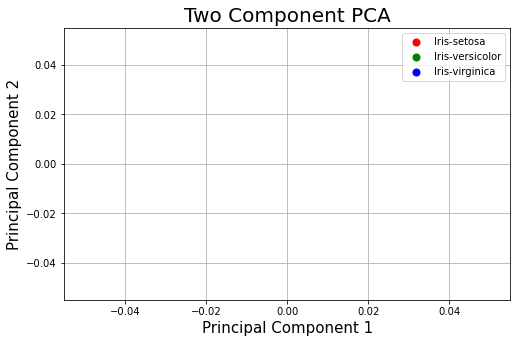

In [ ]:
fig = plt.figure(figsize = (8,5)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('Two Component PCA', fontsize = 20) 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] 
colors = ['r', 'g', 'b'] 
for target, color in zip(targets,colors): 
    indicesToKeep = finalDf['species'] == target  
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'] , 
               finalDf.loc[indicesToKeep, 'principal component 2'] , c = color , s = 50) 
ax.legend(targets) 
ax.grid()

In [ ]:
# from scikit learn

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.components_ # principle axis in a feature space

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [ ]:
pca.explained_variance_ # amt of variance explained by each of teh selected components

array([4.22484077, 0.24224357])

In [ ]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [ ]:
pca.singular_values_

array([25.08986398,  6.00785254])

In [ ]:
pca.transform(X)

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [ ]:
principalDf = pd.DataFrame(data = pca.transform(X) , columns = ['principal component 1', 'principal component 2']) 
principalDf.head()

,principal component 1,principal component 2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [ ]:
finalDf = pd.concat([principalDf,pd.DataFrame(y,columns = ['species'])], axis = 1) 
finalDf.head()

,principal component 1,principal component 2,species
0,-2.684207,0.326607,setosa
1,-2.715391,-0.169557,setosa
2,-2.889820,-0.137346,setosa
3,-2.746437,-0.311124,setosa
4,-2.728593,0.333925,setosa


In [ ]:
pca.get_covariance()

array([[ 0.67919741, -0.03258618,  1.27066452,  0.5321852 ],
       [-0.03258618,  0.18113034, -0.31863564, -0.13363564],
       [ 1.27066452, -0.31863564,  3.11934547,  1.28541527],
       [ 0.5321852 , -0.13363564,  1.28541527,  0.58961806]])

In [ ]:
pca.score(X)

-2.700102878434912

# Another one - Cancer Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

data gives the data of indep variables in a form of an array

target gives the data of target variable in a form of an array

target_names are the names of the categories if any, for categorical target variable which are encoded in target

DESCR is the description of the data

feature_names refer to the corresponding attricute names of the indep variables 

file_name refers to the name of the file

In [ ]:
print('DATA \n\n',cancer.data)
print('\n\nTARGET \n\n',cancer.target)
print('\n\nTarget Names\n\n',cancer.target_names)
print('\n\nFeature Names\n\n',cancer.feature_names)

DATA 

 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


TARGET 

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [ ]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [ ]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Now we can transform this data to its first 2 principal components.

In [ ]:
x_pca = pca.transform(scaled_data)

In [ ]:
print(scaled_data.shape,x_pca.shape)

(569, 30) (569, 2)


We've reduced 30 dimensions to just 2! Let's plot these two dimensions out!

Text(0, 0.5, 'Second Principal Component')

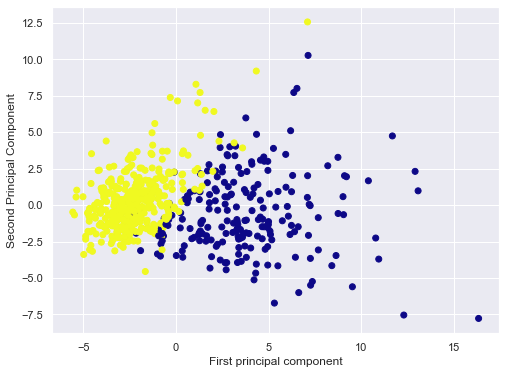

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Interpreting the components
Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [ ]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [ ]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])
df_comp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


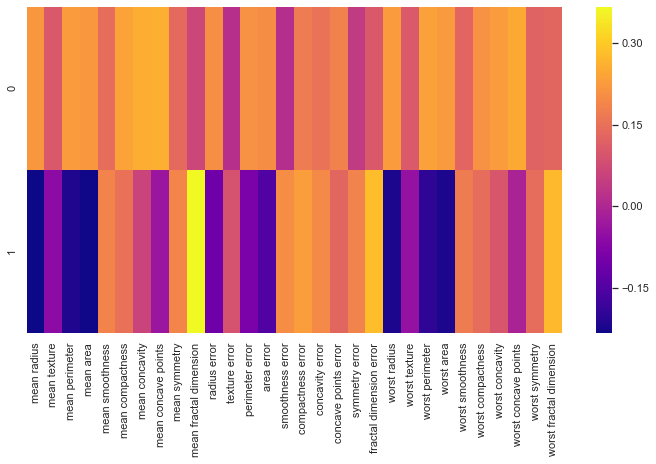

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

his heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

Conclusion
Hopefully this information is useful to you when dealing with high dimensional data!